# Apode Tutorial

This tutorial shows the current functionalities of the Apode package. Apode contains various methods to calculate measures and generate graphs on the following topics:

* Poverty
* Inequality
* Welfare
* Polarization
* Concentration


## Getting Started

### ApodeData class

The objects are created as:

    ad = ApodeData(DataFrame,income_column)
    
Where income_column is the name of the column of interest for the analysis in the dataframe.

Methods that calculate indicators:
   
    ad.poverty(method,*args)    
    ad.ineq(method,*args)
    ad.welfare(method,*args) 
    ad.polarization(method,*args)
    ad.concentration(method,*args)
 
Métodos that generate graphs:

    ad.plot.hist()
    ad.plot.tip(**kwargs)
    ad.plot.lorenz(**kwargs)
    ad.plot.pen(**kwargs)
    
    

### Data Creation and Description

* Data can be generated manually or by means of a simulation. They are contained in a DataFrame object.
* Other categoric variables that allow for the indicators to be applied by groups (groupby) might be available.

In [1]:
import numpy as np
import pandas as pd

from apode import ApodeData
from apode import datasets 

### Manual data loading

An object can be generated from a DataFrame or from a valid argument in the DataFrame method.

In [2]:
x = [23, 10, 12, 21, 4, 8, 19, 15, 11, 9]
df1 = pd.DataFrame({'x':x})
ad1 = ApodeData(df1, income_column="x") 
ad1

,x
0,23
1,10
2,12
3,21
4,4
5,8
6,19
7,15
8,11
9,9


### Data simulation

The module *datasets* contains some distribution examples commonly used to model the income distribution. For example:

In [3]:
# Generate data
n = 1000 # observations
seed = 12345
ad2 = datasets.make_weibull(seed=seed,size=n)
ad2.describe()

,x
count,1000.000000
mean,45.408376
std,30.207372
min,0.112876
25%,22.363891
50%,39.404779
75%,62.690946
max,190.596705


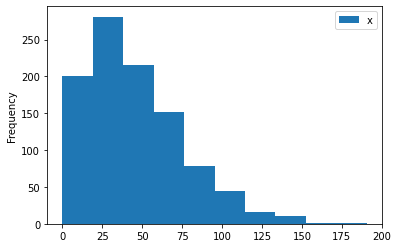

In [4]:
# Plotting the distribution
ad2.plot();

Other distributions are: uniform, lognormal, exponential, pareto, chisquare and gamma. For help type:

In [5]:
help(datasets.make_weibull)

Help on function make_weibull in module apode.datasets:

make_weibull(seed=None, size=100, a=1.5, c=50, nbin=None)
    Weibull Distribution.
    
    Parameters
    ----------
    seed: int, optional(default=None)
    
    size: int, optional(default=100)
    
    a: float, optional(default=1.5)
    
    c: float, optional(default=50)
    
    nbin: int, optional(default=None)
    
    Return
    ------
    out: float array
        Array of random numbers.



## Poverty 

The following poverty measures are implemented:

- `headcount`: Headcount Index
- `gap`: Poverty gap Index
- `severity`: Poverty Severity Index
- `fgt`: Foster–Greer–Thorbecke Indices
- `sen`: Sen Index
- `sst`: Sen-Shorrocks-Thon Index
- `watts`: Watts Index
- `cuh`: Clark, Ulph and Hemming Indices
- `takayama`: Takayama Index
- `kakwani`: Kakwani Indices
- `thon`: Thon Index
- `bd`: Blackorby and Donaldson Indices
- `hagenaars`: Hagenaars Index
- `chakravarty`: Chakravarty Indices

Also the TIP curve, which allows for a graphic comparison of poverty amongst different distributions.

### Numerical measures

All the methods require the poverty line (*pline*) as argument for get a absolute measure of poverty.

In [8]:
pline = 50 # Poverty line
p = ad2.poverty('headcount',pline=pline)
p

0.626

If the argument is omitted 0.5\*median is used. Other options for a relative measure of poverty are:

In [9]:
# pline = factor*stat  [stat: mean, median, quantile_q]
p1 = ad2.poverty('headcount')  # pline= 0.5*median(y)
p2 = ad2.poverty('headcount', pline='median', factor=0.5)
p3 = ad2.poverty('headcount', pline='quantile', q=0.5, factor=0.5)
p4 = ad2.poverty('headcount', pline='mean', factor=0.5)
p1, p2, p3, p4

(0.214, 0.214, 0.214, 0.256)

Some methods require an additional parameter, *alpha*. In some cases, a default value is set for it. The summary function shows the result of various methods:

In [10]:
df_p = poverty_summary(ad2)
df_p

,method,measure
0,headcount,0.214000
1,gap,0.088038
2,severity,0.052488
3,fgt(1.5),0.066208
4,sen,0.134042
5,sst,0.164471
6,watts,0.155405
7,cuh(0),0.917773
8,cuh(0.5),0.112144
9,takayama,0.083811


### Graph measures

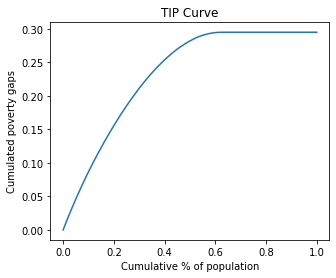

In [11]:
# TIP curve
ad2.plot.tip(pline=pline);

### Exercise: Comparison of poverty measures

In this exercise some properties of three poverty measures are compared (they are part of the *FGT* class). The exercise compares three distributions:

In [12]:
x1 = np.array([5,20,35,60])
x2 = x1 +  np.array([10, 10, 10, 0])
x3 = x2 +  np.array([10,0,-10, 0])
dfe = pd.DataFrame({'x1':x1,'x2':x2, 'x3':x3})
dfe

,x1,x2,x3
0,5,15,25
1,20,30,30
2,35,45,35
3,60,60,60


In [13]:
pline = 50
ade1 = ApodeData(dfe,income_column='x1') 
ade2 = ApodeData(dfe,income_column='x2') 
ade3 = ApodeData(dfe,income_column='x3') 

# Headcount
ade1.poverty('headcount',pline=pline), ade2.poverty('headcount',pline=pline), ade3.poverty('headcount',pline=pline)

(0.75, 0.75, 0.75)

The greatest virtues of the *headcount index* are that it is simple to construct and
easy to understand. However, the measure does not take the intensity of poverty into account (the three indices are equal).

In [58]:
# Poverty Gap
ade1.poverty('gap',pline=pline), ade2.poverty('gap',pline=pline), ade3.poverty('gap',pline=pline)

(0.45, 0.30000000000000004, 0.3)

The *poverty gap* index gives an idea of the cost to eliminate poverty (in relation to the poverty line). But the previous indices are unsatisfactory because they violate the *transfer principle* which states that transfers from a richer person to a poorer person should improve the welfare measure (x2 versus x3). This property is captured by the *severity* index.

In [59]:
# Severity
ade1.poverty('severity',pline=pline), ade2.poverty('severity',pline=pline), ade3.poverty('severity',pline=pline)

(0.315, 0.16499999999999998, 0.125)

### Exercise: Contribution of each subgroup to aggregate poverty

Another convenient feature of the *FGT* class of poverty measures is that they can be disaggregated for population subgroups and the contribution of each subgroup
to aggregate poverty can be calculated. For instance:    

In [36]:
x = [23, 10, 12, 21, 4, 8, 19, 15, 5, 7]
y = [10,10,20,10,10,20,20,20,10,10] 
region = ['urban','urban','rural','urban','urban','rural','rural','rural','urban','urban'] 
dfa = pd.DataFrame({'x':x,'region':region})
ada1 = ApodeData(dfa,income_column='x') 
ada1

,x,region
0,23,urban
1,10,urban
2,12,rural
3,21,urban
4,4,urban
5,8,rural
6,19,rural
7,15,rural
8,5,urban
9,7,urban


In [39]:
# group calculation according to variable "y"
pline = 11
pg = poverty_groupby(ada1,'headcount',group_column='region', pline=pline)
pg

,x_measure,x_weight
rural,0.250000,4
urban,0.666667,6


In [40]:
# simple calculation
ps = ada1.poverty('headcount',pline=pline)
ps

0.5

In [41]:
# If the indicator is decomposable, the same result is attained:
pg_p = sum(pg['x_measure']*pg['x_weight']/sum(pg['x_weight']))
pg_p

0.5

## Inequality 

The following inequality measures are implemented:

- `gini`: Gini Index
- `entropy`: Generalized Entropy Index
- `atkinson`: Atkinson Index
- `rrange`: Relative Range
- `rad`: Relative average deviation
- `cv`: Coefficient of variation
- `sdlog`: Standard deviation of log
- `merhan`: Merhan index
- `piesch`: Piesch Index
- `bonferroni`: Bonferroni Indices
- `kolm`: Kolm Index

Also the Lorenz and Pen curves, which allows for a graphic comparison of inequality among different distributions.

### Numerical measures

In [18]:
# Evaluate an inequality method
q = ad2.inequality('gini')
q

0.3652184907296814

The summary function shows the result of various methods:

In [19]:
df_ineq = inequality_summary(ad2)
df_ineq

,method,measure
0,rrange,4.194905
1,rad,0.264575
2,cv,0.664905
3,sdlog,0.916263
4,gini,0.365218
5,merhan,0.512500
6,piesch,0.288587
7,bonferroni,0.510418
8,kolm(0.5),36.566749
9,ratio(0.05),0.032061


### Graph measures

The relative, generalized and absolute Lorenz Curves are implemented. Alse de Pen Parade curve.

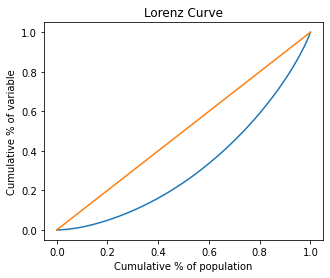

In [20]:
# Lorenz Curves
ad2.plot.lorenz();

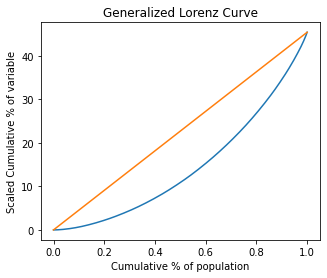

In [21]:
# Generalized Lorenz Curve
ad2.plot.lorenz(alpha='g');

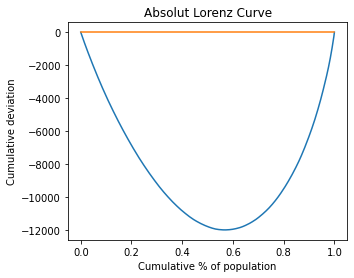

In [22]:
# Absolute Lorenz Curve
ad2.plot.lorenz(alpha='a');

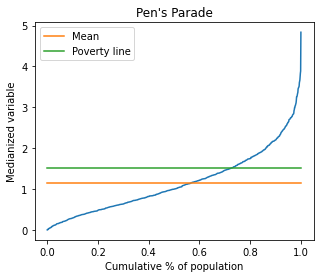

In [23]:
# Pen's Parade
ad2.plot.pen(pline=60);

### Exercise: Redistributive Effect of Fiscal Policy

Income pre and post fiscal policy:

In [24]:
# Income pre fiscal policy:
y_pre = np.array([20, 30, 40, 60, 100])

# Fiscal policy
tax = 0.2*np.maximum(y_pre-35,0)  # tax formula
revenue = np.sum(tax)             # total revenue
transfers = revenue/len(y_pre)    # per capita transfers

# Income post fiscal policy:
y_post = y_pre - tax + transfers

In [25]:
# ApodeData
df_pre = pd.DataFrame({'y1':y_pre})
ad_pre = ApodeData(df_pre,income_column='y1')

df_post = pd.DataFrame({'y2':y_post})
ad_post = ApodeData(df_post,income_column='y2')
ad_post

,y2
0,23.8
1,33.8
2,42.8
3,58.8
4,90.8


In [26]:
# Gini 
ad_pre.inequality.gini(), ad_post.inequality.gini()  # decrease inequality

(0.30399999999999994, 0.25440000000000024)

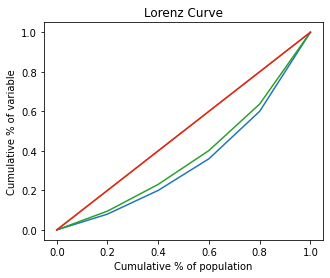

In [27]:
# Lorenz Curves
ax = ad_pre.plot.lorenz()
ad_post.plot.lorenz(ax=ax);

## Welfare

The following welfare measures are implemented:

- `utilitarian`: Utilitarian utility function
- `rawlsian`: Rawlsian utility function
- `isoelastic`: Isoelastic utility function
- `sen`: Sen utility function
- `theill`: Theill utility function
- `theilt`: Theilt utility function

In [28]:
# Evaluate a welfare method
w = ad2.welfare('sen')
w

28.824397753868958

The summary function shows the result of various methods:

In [29]:
df_wlf = welfare_summary(ad2)
df_wlf

,method,measure
0,utilitarian,45.408376
1,rawlsian,0.112876
2,sen,28.824398
3,theill,34.253866
4,theilt,36.529160
5,isoelastic(0),45.408376
6,isoelastic(1),3.533799
7,isoelastic(2),-0.059726
8,isoelastic(inf),0.112876


## Polarization 

The following welfare measures are implemented:

- `ray`: Esteban and Ray index
- `wolfson`: Wolfson index

In [30]:
# Evaluate a polarization method
p = ad2.polarization('ray')
p

0.03316795744715791

The summary function shows the result of various methods:

In [31]:
df_pz = polarization_summary(ad2)
df_pz

,method,measure
0,ray,0.033168
1,wolfson,0.357081


## Concentration

The following concentration measures are implemented:

- `herfindahl`: Herfindahl-Hirschman Index
- `rosenbluth`: Rosenbluth Index
- `concentration_ratio`: Concentration Ratio Index

In [32]:
# Evaluate a concentration method
c = ad2.concentration('herfindahl')
c

0.00044254144331556705

The summary function shows the result of various methods:

In [33]:
df_conc = concentration_summary(ad2)
df_conc 

,method,measure
0,herfindahl,0.000443
1,herfindahl(norm),0.000443
2,rosenbluth,0.001575
3,concentration_ratio(1),0.004197
4,concentration_ratio(3),0.010900


## References

> Schröder, C. (2011). Cowell, F.: Measuring Inequality. London School of Economics Perspectives in Economic Analysis.

> Adler, M. D., & Fleurbaey, M. (Eds.). (2016). The Oxford handbook of well-being and public policy. Oxford University Press.

> Haughton, J., & Khandker, S. R. (2009). Handbook on poverty+ inequality. World Bank Publications.

> Gasparini, L., Cicowiez, M., & Sosa Escudero, W. (2012). Pobreza y desigualdad en América Latina. Temas Grupo Editorial.

> Araar, A., & Duclos, J. Y. (2007). DASP: Distributive analysis stata package. PEP, World Bank, UNDP and Université Laval.

### Apendix

In [6]:
# Evaluating a list of poverty methods
def poverty_summary(ad, pline=None, factor=1.0, q=None):
    import apode
    #y = ad[ad.income_column].values # ver falla
    y = ad.x.values 
    pline = apode.poverty._get_pline(y, pline, factor, q)
    
    pov_list = [["headcount", None],
             ["gap", None],
             ["severity",None],
             ["fgt",1.5],
             ["sen",None],
             ["sst",None],
             ["watts",None],
             ["cuh",0],
             ["cuh",0.5],
             ["takayama",None],
             ["kakwani",None],
             ["thon",None],
             ["bd",1.0],
             ["bd",2.0],
             ["hagenaars",None],
             ["chakravarty",0.5]]
    p = []
    pl = []
    for elem in pov_list:
        if elem[1]==None:
            p.append(ad.poverty(elem[0],pline=pline))
            pl.append(elem[0])
        else:
            p.append(ad.poverty(elem[0],pline=pline,alpha=elem[1]))
            pl.append(elem[0] + '(' + str(elem[1]) +')')
    df_p = pd.concat([pd.DataFrame(pl),pd.DataFrame(p)],axis=1)
    df_p.columns = ['method','measure']
    return df_p

# Evaluate a list of inequality methods
def inequality_summary(ad):
    ineq_list = [["rrange", None],
             ["rad", None],
             ["cv",None],
             ["sdlog",None],
             ["gini",None],
             ["merhan",None],
             ["piesch",None],
             ["bonferroni",None],
             ["kolm",0.5],
             ["ratio",0.05],
             ["ratio",0.2],
             ["entropy",0],
             ["entropy",1],
             ["entropy",2],         
             ["atkinson",0.5],
             ["atkinson",1.0],
             ["atkinson",2.0]]
    p = []
    pl = []
    for elem in ineq_list:
        if elem[1]==None:
            p.append(ad.inequality(elem[0]))
            pl.append(elem[0])
        else:
            p.append(ad.inequality(elem[0],alpha=elem[1]))
            pl.append(elem[0] + '(' + str(elem[1]) +')')
    df_ineq = pd.concat([pd.DataFrame(pl),pd.DataFrame(p)],axis=1)
    df_ineq.columns = ['method','measure']    
    return df_ineq   

# Evaluate a list of welfare methods
def welfare_summary(ad):
    wlf_list = [["utilitarian", None],
             ["rawlsian", None],
             ["sen",None],
             ["theill",None],
             ["theilt",None],
             ["isoelastic",0],
             ["isoelastic",1],
             ["isoelastic",2],
             ["isoelastic",np.Inf]]
    p = []
    pl = []
    for elem in wlf_list:
        if elem[1]==None:
            p.append(ad.welfare(elem[0]))
            pl.append(elem[0])
        else:
            p.append(ad.welfare(elem[0],alpha=elem[1]))
            pl.append(elem[0] + '(' + str(elem[1]) +')')

    df_wlf = pd.concat([pd.DataFrame(pl),pd.DataFrame(p)],axis=1)
    df_wlf.columns = ['method','measure']
    return df_wlf 

# Evaluate a list of polarization methods
def polarization_summary(ad):
    pol_list = [["ray", None],
             ["wolfson", None]]
    p = []
    pl = []
    for elem in pol_list:
        if elem[1]==None:
            p.append(ad2.polarization(elem[0]))
            pl.append(elem[0])
        else:
            p.append(ad2.polarization(elem[0],alpha=elem[1]))
            pl.append(elem[0] + '(' + str(elem[1]) +')')
    df_pz = pd.concat([pd.DataFrame(pl),pd.DataFrame(p)],axis=1)
    df_pz.columns = ['method','measure']
    return df_pz 

# Evaluate a list of concentration methods
def concentration_summary(ad):
    conc_list = [["herfindahl", None],
             ["herfindahl", True],
             ["rosenbluth",None],
             ["concentration_ratio",1],
             ["concentration_ratio",3]]
    p = []
    pl = []
    for elem in conc_list:
        if elem[1]==None:
            p.append(ad2.concentration(elem[0]))
            pl.append(elem[0])
        else:
            if elem[0]=="herfindahl":
                p.append(ad2.concentration(elem[0],normalized=elem[1]))  # check keyword
                pl.append(elem[0] + '(norm)')
            elif elem[0]=="concentration_ratio":
                p.append(ad2.concentration(elem[0],k=elem[1]))  # check keyword            
                pl.append(elem[0] + '(' + str(elem[1]) +')')
            else:
                p.append(ad2.concentration(elem[0],alpha=elem[1]))
                pl.append(elem[0] + '(' + str(elem[1]) +')')
    df_conc = pd.concat([pd.DataFrame(pl),pd.DataFrame(p)],axis=1)
    df_conc.columns = ['method','measure']
    return df_conc 


In [34]:
# receives a dataframe and applies a measure according to the column "varg"
def poverty_groupby(ad,method,group_column,**kwargs):
    return measure_groupby(ad,method,group_column,measure='poverty',**kwargs)

def measure_groupby(ad,method,group_column,measure,**kwargs):
    a = []; b = []; c = []
    for name, group in ad.groupby(group_column):
        adi = ApodeData(group,income_column=ad.income_column)
        if measure=='poverty':
            p = adi.poverty(method,**kwargs)
        elif measure=='inequality':
            p = adi.inequality(method,**kwargs)
        elif measure=='concentration':
            p = adi.concentration(method,**kwargs)
        elif measure=='polarization':
            p = adi.polarization(method,**kwargs)
        elif measure=='welfare':
            p = adi.welfare(method,**kwargs)            
        a.append(name)
        b.append(p)
        c.append(group.shape[0])
    xname = ad.income_column + "_measure"
    wname = ad.income_column + "_weight"
    return pd.DataFrame({xname: b, wname: c}, index=pd.Index(a))  